In [1]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt 
import seaborn as sns # data visualizationsns.set_style('whitegrid') # set style for visualization
import warnings 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from tools import *
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',111)

warnings.filterwarnings('ignore')

In [2]:
df_price = pd.read_csv('data_price_ratio.csv')
df_price=df_price[['premium_median','coverage_limit_median','price_ratio_mean','price_ratio_std','price_ratio_median']]

In [3]:
df =pd.read_excel("insurance_compagies_4.xlsx")

df_price['Pricing Method']=df['Pricing Method']


In [4]:
df_price['Pricing Method'].value_counts()

tarification à posteriori    5021
tarification à priori        4979
Name: Pricing Method, dtype: int64

In [5]:
Pricing_Method_mapping = {'tarification à posteriori': 1,
                'tarification à priori': 0           
                         }
df_price['Pricing Method']=df_price['Pricing Method'].map(Pricing_Method_mapping)

In [6]:
df=df_price.copy()

*******************
VIF Score lower than  25
   VIF Factor               features
0    7.802233         premium_median
1   24.379556  coverage_limit_median
3    2.619649        price_ratio_std
5    1.970656         Pricing Method
*******************
VIF Score higher than  25
   VIF Factor            features
2  169.008410    price_ratio_mean
4  168.989728  price_ratio_median


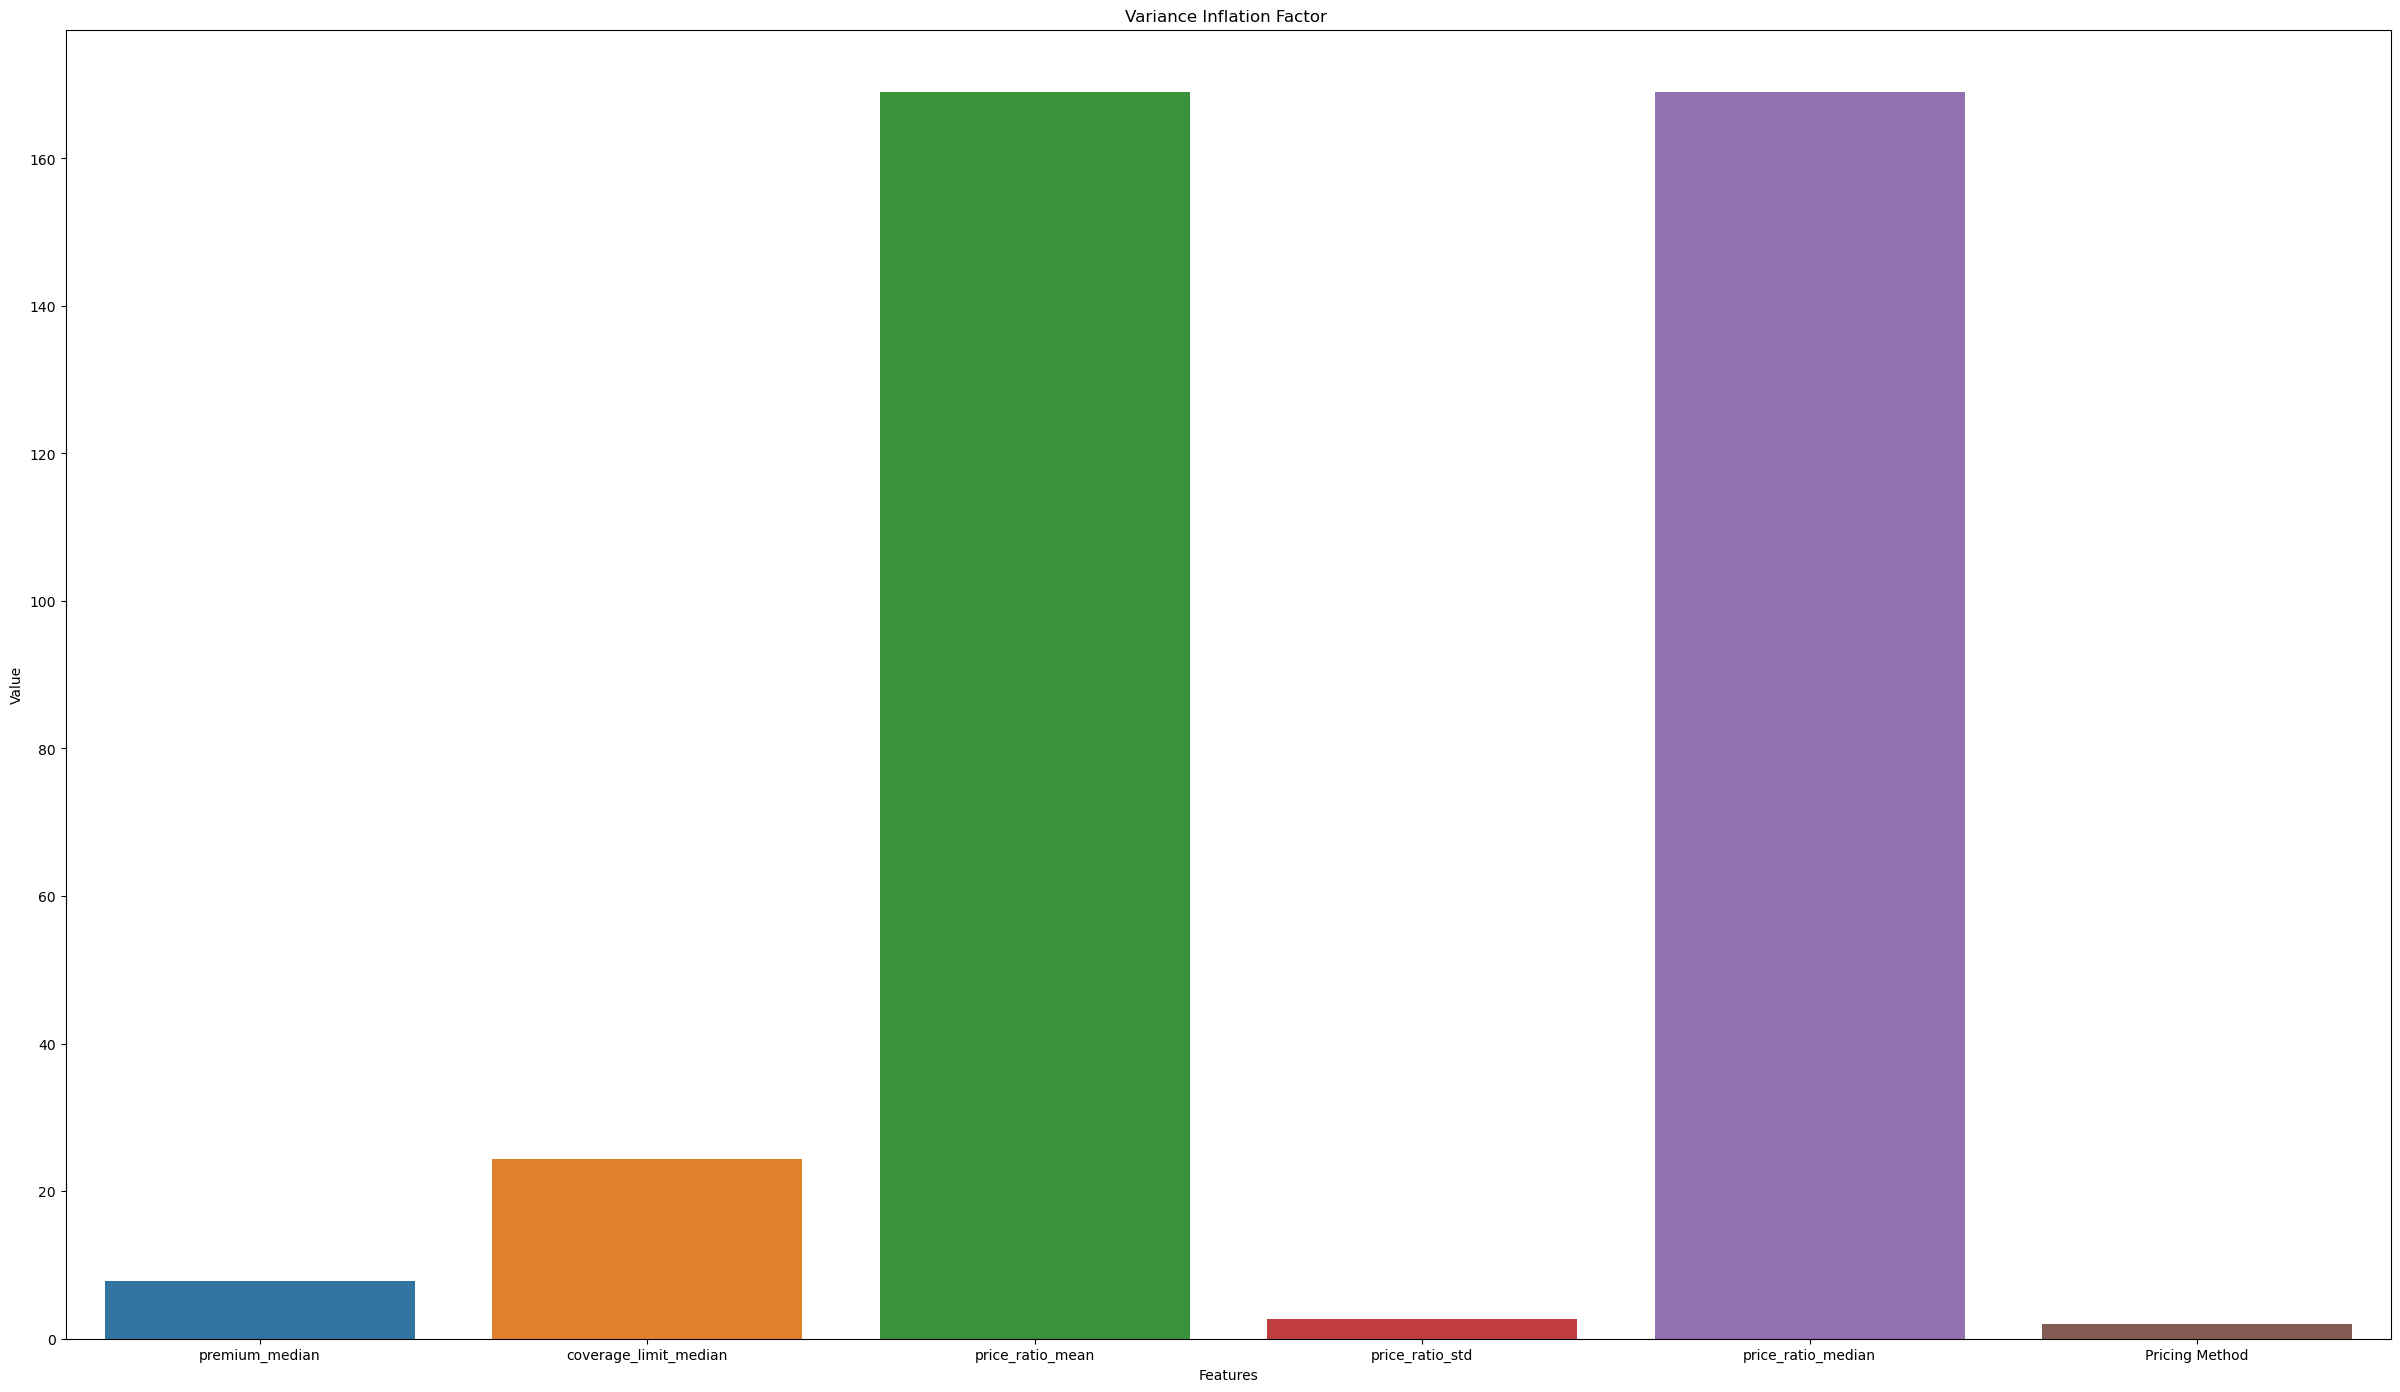

In [7]:
df1=VIF_features_selection(df,25)

In [8]:
df

,premium_median,coverage_limit_median,price_ratio_mean,price_ratio_std,price_ratio_median,Pricing Method
0,3329.310,655128.5,219.367882,37.450287,203.841147,0
1,3329.870,881113.0,216.616851,86.309492,264.608829,1
2,2497.425,597640.0,239.459384,14.137536,240.577142,1
3,2815.130,595567.0,160.328840,49.994714,176.912950,0
4,3057.155,838738.5,300.691197,78.417741,292.320682,1
...,...,...,...,...,...,...
9995,3920.155,226018.0,90.618434,65.408400,57.607327,1
9996,2586.940,461869.0,175.339075,24.374702,175.276920,1
9997,2710.750,561935.5,212.884089,36.960296,204.467855,0
9998,2775.220,545067.0,207.690687,10.122669,205.706156,1


In [9]:
df1['price_ratio_median']=df['price_ratio_mean']
df1.head()

,premium_median,coverage_limit_median,price_ratio_std,Pricing Method,price_ratio_median
0,3329.310,655128.5,37.450287,0,219.367882
1,3329.870,881113.0,86.309492,1,216.616851
2,2497.425,597640.0,14.137536,1,239.459384
3,2815.130,595567.0,49.994714,0,160.328840
4,3057.155,838738.5,78.417741,1,300.691197


In [10]:
df1=df1.drop(['price_ratio_std'],axis=1)


In [11]:
df1.head()

,premium_median,coverage_limit_median,Pricing Method,price_ratio_median
0,3329.310,655128.5,0,219.367882
1,3329.870,881113.0,1,216.616851
2,2497.425,597640.0,1,239.459384
3,2815.130,595567.0,0,160.328840
4,3057.155,838738.5,1,300.691197


In [12]:
scaler = StandardScaler()
scaled_data =scaler.fit_transform(df1)

## "Clustering Criteria for Insurance Agencies"
    
   "Clustering Criteria for Insurance Agencies" outlines a set of parameters designed to group insurance agencies based on key performance indicators. These criteria aim to facilitate the development of a recommendation system by categorizing agencies .


## Feature : Price 

#### Optimal Price Ratio Median:


   
#### Competitive Premium Price: 

  
#### Adequate Coverage Limit Median:  

   
   
#### Effective Pricing Method:


updated
Cluster : 2  in process....
Cluster : 3  in process....
Cluster : 4  in process....
Cluster : 5  in process....
Cluster : 6  in process....
Cluster : 7  in process....
Cluster : 8  in process....
Cluster : 9  in process....


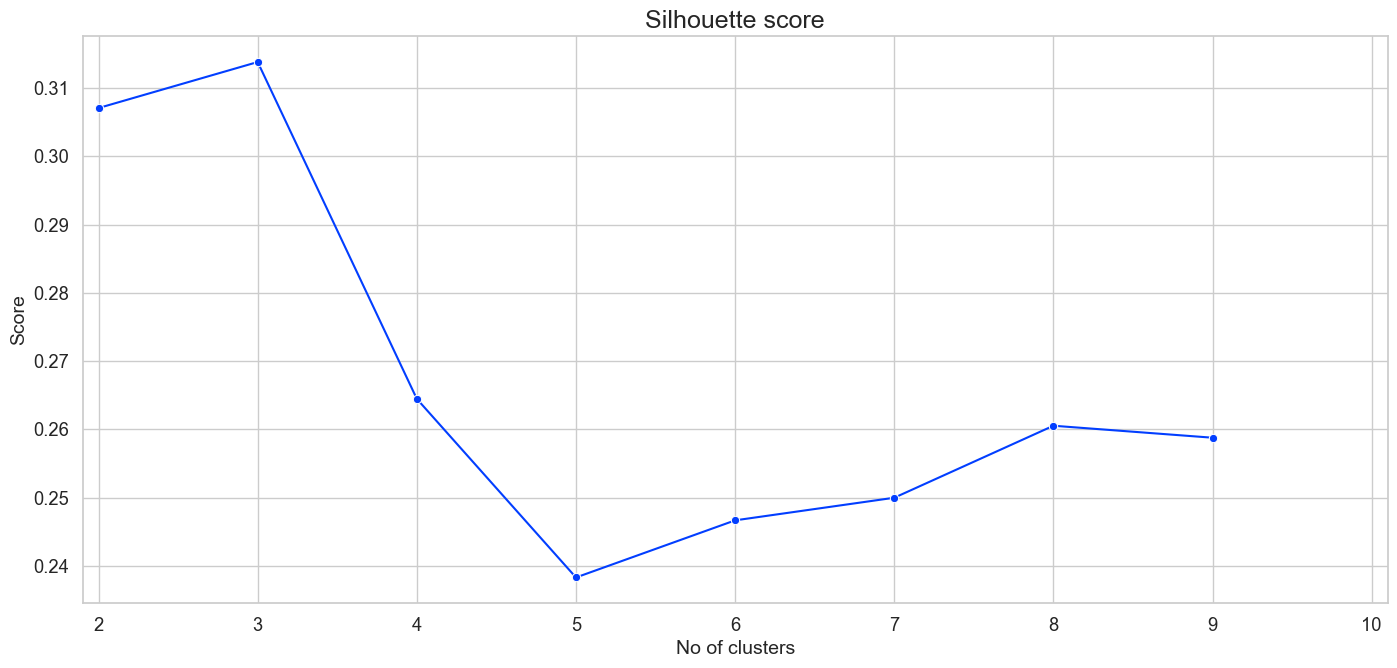

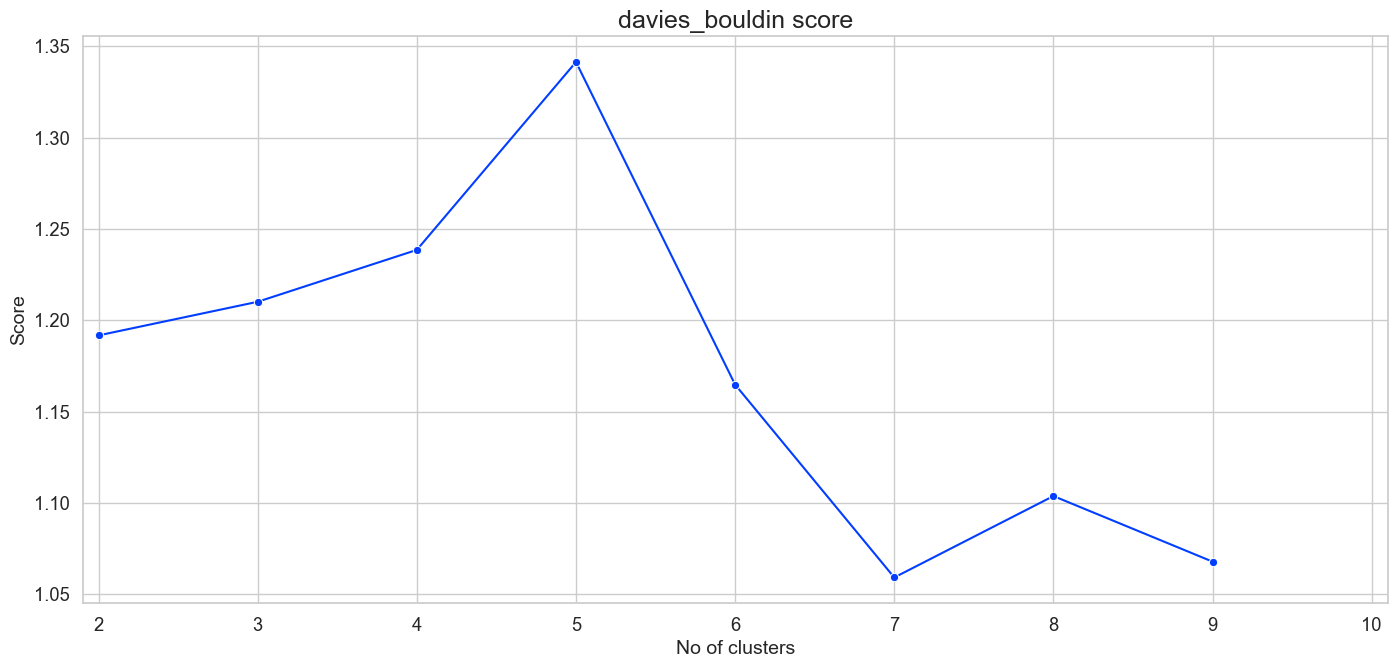

In [42]:
model =AgglomerativeClustering(linkage='ward',compute_full_tree=True)
ideal_model=Hiearchical_clustering(model,10,scaled_data)

In [43]:
model =AgglomerativeClustering(linkage='ward',compute_full_tree=True)
model.set_params(n_clusters=3)

clusters=model.fit_predict(scaled_data)
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(scaled_data, index=df1.index, columns=df1.columns)
X_clustered["cluster"] = clusters
means =  X_clustered.groupby(by="cluster").mean()
best_centroids=means.reset_index().drop(['cluster'],axis=1)

                    ****************************                      
            Visualization of Boxplot               


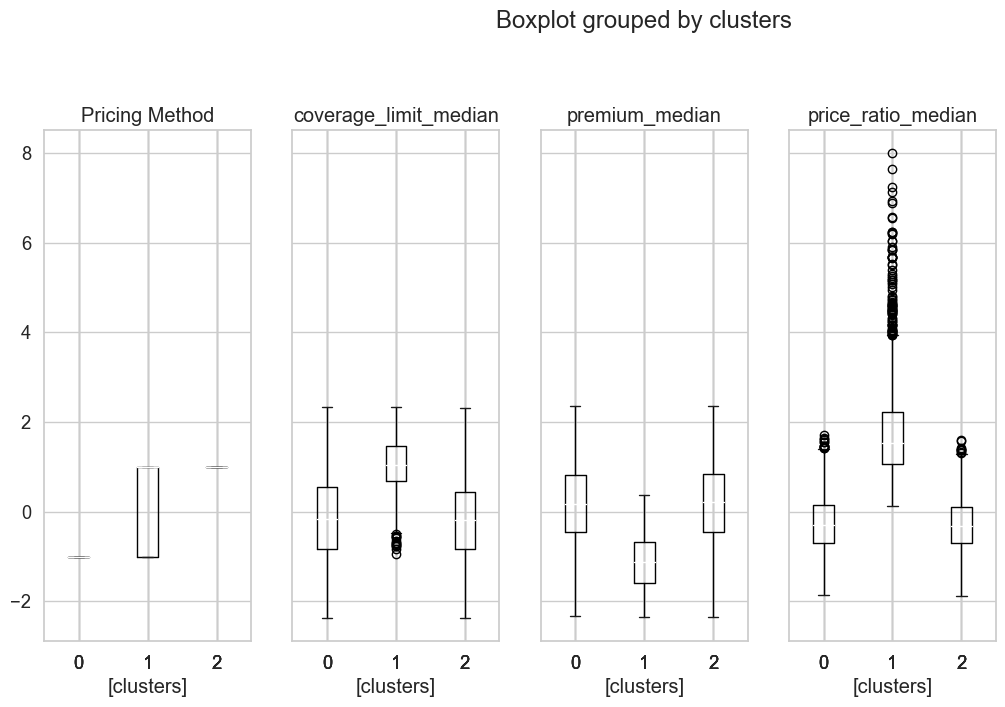

                    ****************************                      
            Visualization of Violin               


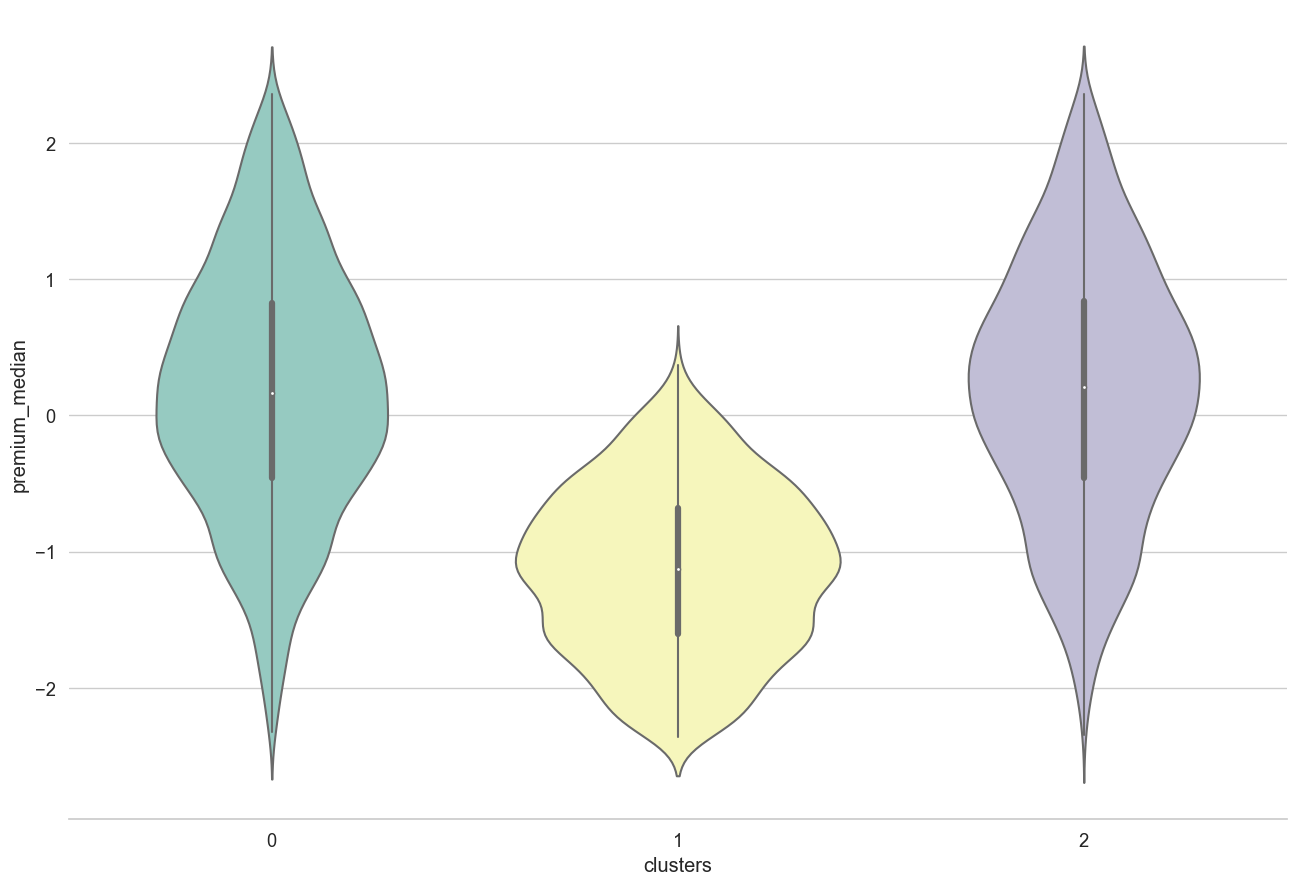

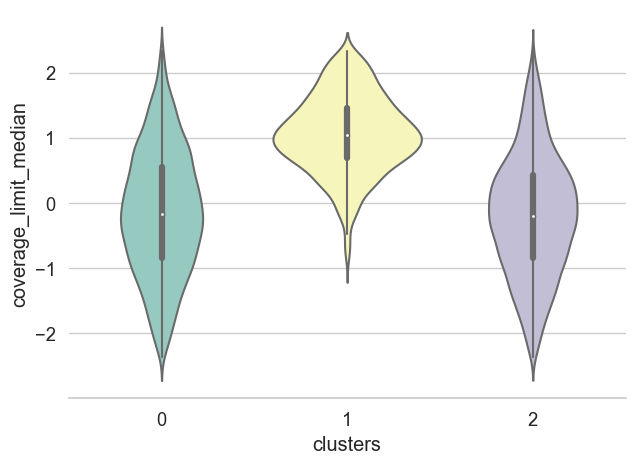

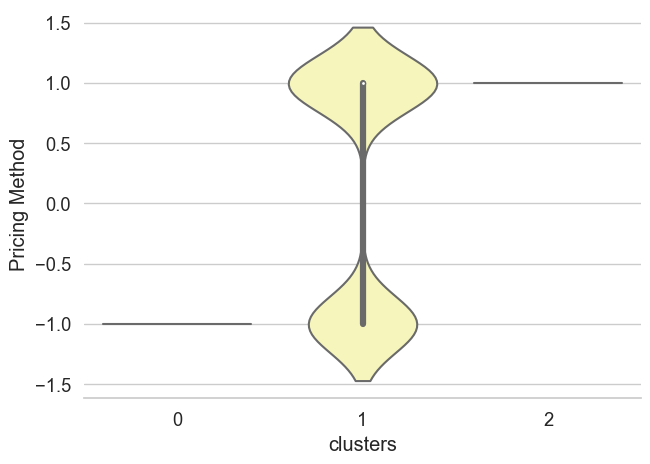

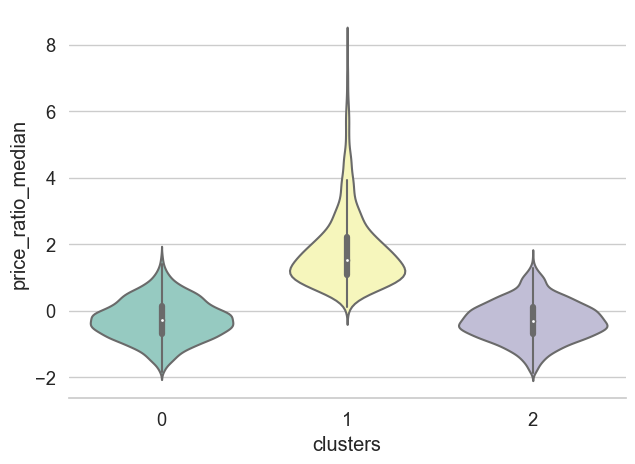

            Visualization of Coordination Chart               


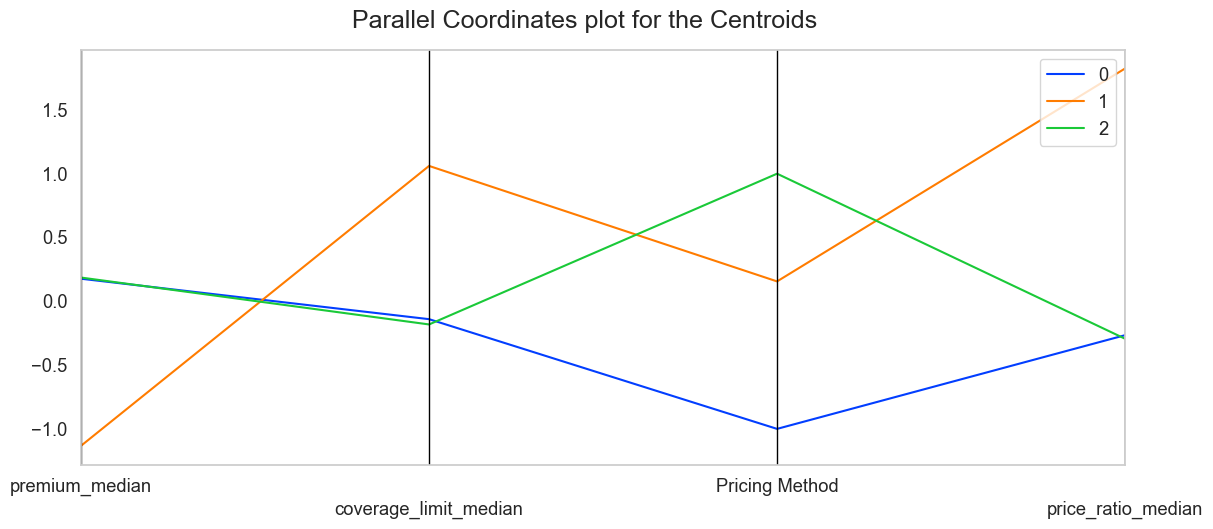

In [44]:
Visualization_results(scaled_data,df1,best_centroids,clusters,pca_v=False)

## Observations from the boxplot chart:

   * Clusters 0 and 1 exhibit notable similarity, particularly in the features coverage_limit_median and premium_median price_ratio. This similarity suggests that these clusters may represent similar customer segments or insurance plan offerings with comparable coverage limits and premium pricing ratios.
   * In contrast, Cluster 2 stands out with higher mean values in both coverage_limit_median and price_ratio_median. This indicates that Cluster 2 may represent a distinct customer segment or insurance plan category characterized by higher coverage limits and potentially premium pricing ratios compared to Clusters 0 and 1.

## Observations from the coordination plot:

  * Consistent with the boxplot analysis, the coordination plot confirms the similarity between Clusters 0 and 1. Both clusters exhibit close proximity in the feature space, indicating similar characteristics or offerings regarding coverage limits and premium pricing ratios.
  * Cluster 2 stands out distinctly from Clusters 0 and 1 in the coordination plot. It occupies a different region of the feature space, suggesting unique characteristics or attributes compared to the other clusters. Specifically, Cluster 2 demonstrates higher values in both coverage_limit_median and price_ratio_median, indicating potentially higher coverage limits and premium pricing ratios within this cluster.


In [13]:
scaler = StandardScaler()
scaled_data =scaler.fit_transform(df1)

Cluster : 2  In process....
Cluster : 3  In process....
Cluster : 4  In process....
Cluster : 5  In process....
Cluster : 6  In process....


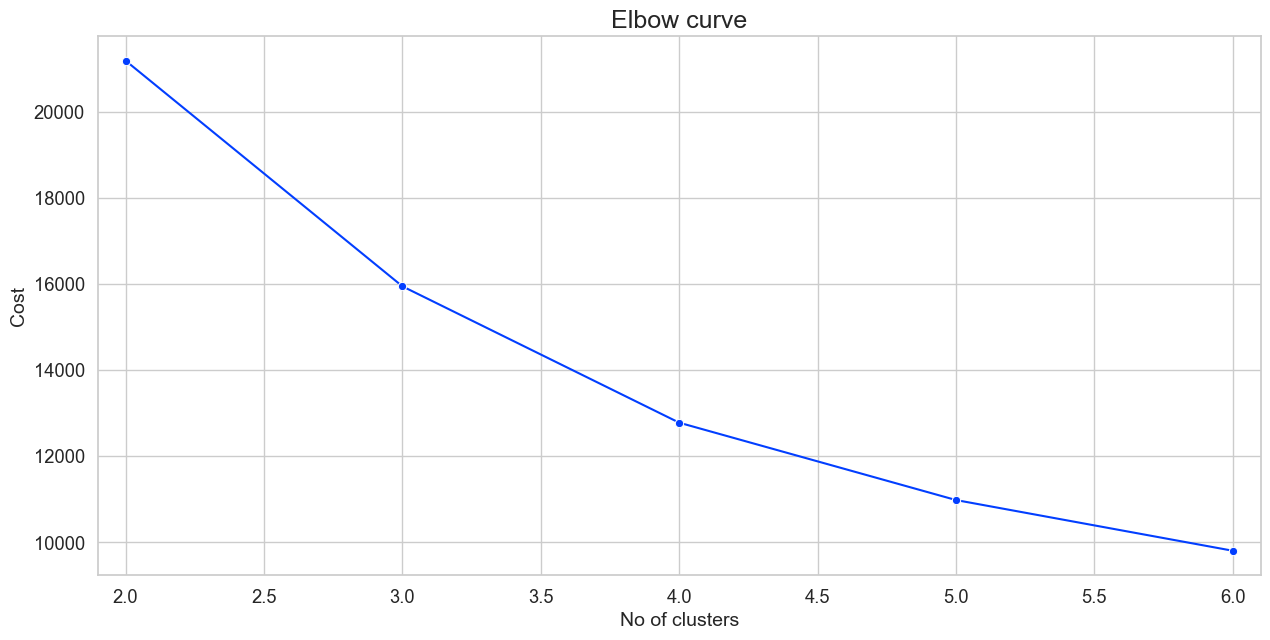

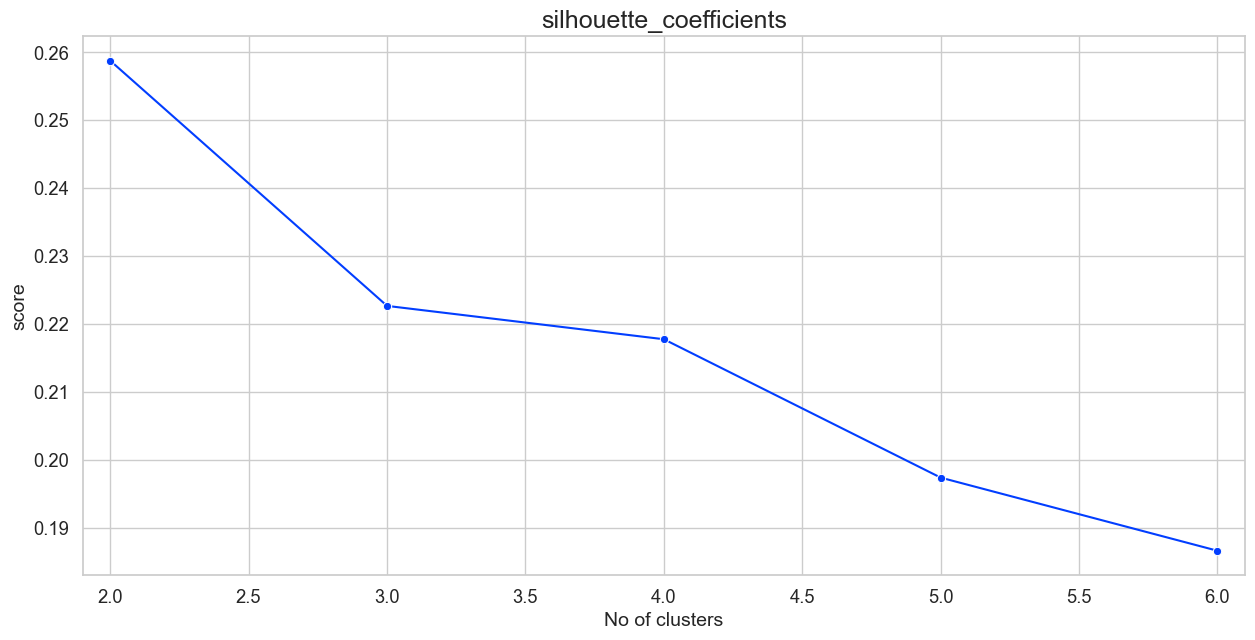

In [14]:
KPrototypes_clustering(2,6,scaled_data,[2])

In [51]:
test_model = KPrototypes(n_clusters=4, init='Huang', random_state=42,verbose=1)
clusters=test_model.fit_predict(scaled_data, categorical=[2])
best_centroids=test_model.cluster_centroids_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3790, ncost: 13989.99565210437
Run: 1, iteration: 2/100, moves: 1735, ncost: 13044.748332131569
Run: 1, iteration: 3/100, moves: 759, ncost: 12879.012562591457
Run: 1, iteration: 4/100, moves: 348, ncost: 12837.127149441616
Run: 1, iteration: 5/100, moves: 192, ncost: 12822.179312639655
Run: 1, iteration: 6/100, moves: 110, ncost: 12816.917493426616
Run: 1, iteration: 7/100, moves: 72, ncost: 12814.606139840223
Run: 1, iteration: 8/100, moves: 40, ncost: 12813.7395280755
Run: 1, iteration: 9/100, moves: 24, ncost: 12813.541257903493
Run: 1, iteration: 10/100, moves: 12, ncost: 12813.408303496242
Run: 1, iteration: 11/100, moves: 13, ncost: 12813.323813722636
Run: 1, iteration: 12/100, moves: 7, ncost: 12813.293010215524
Run: 1, iteration: 13/100, moves: 5, ncost: 12813.279921507292
Run: 1, iteration: 14/100, moves: 2, ncost: 12813.274655930163
Run: 1, iteration: 15/100, move

Run: 8, iteration: 14/100, moves: 3, ncost: 12815.623039730142
Run: 8, iteration: 15/100, moves: 1, ncost: 12815.62087728929
Run: 8, iteration: 16/100, moves: 1, ncost: 12815.619304628568
Run: 8, iteration: 17/100, moves: 0, ncost: 12815.619304628568
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 1668, ncost: 13534.713276124725
Run: 9, iteration: 2/100, moves: 1201, ncost: 13060.439207239331
Run: 9, iteration: 3/100, moves: 645, ncost: 12929.259679864617
Run: 9, iteration: 4/100, moves: 373, ncost: 12874.443610039994
Run: 9, iteration: 5/100, moves: 271, ncost: 12844.083789795415
Run: 9, iteration: 6/100, moves: 204, ncost: 12825.891373233027
Run: 9, iteration: 7/100, moves: 132, ncost: 12818.811935260735
Run: 9, iteration: 8/100, moves: 99, ncost: 12814.76774018926
Run: 9, iteration: 9/100, moves: 58, ncost: 12813.286909507966
Run: 9, iteration: 10/100, moves: 29, ncost: 12812.820443320776
Run: 9, iteration: 11/100, mov

                    ****************************                      
            Visualization of Boxplot               


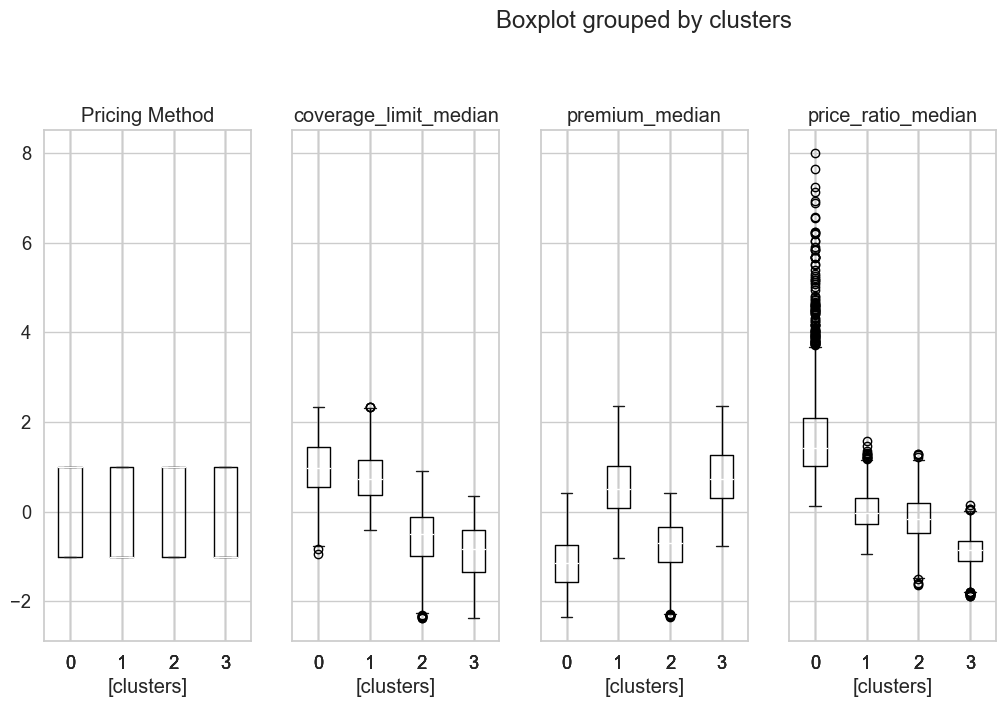

                    ****************************                      
            Visualization of Violin               


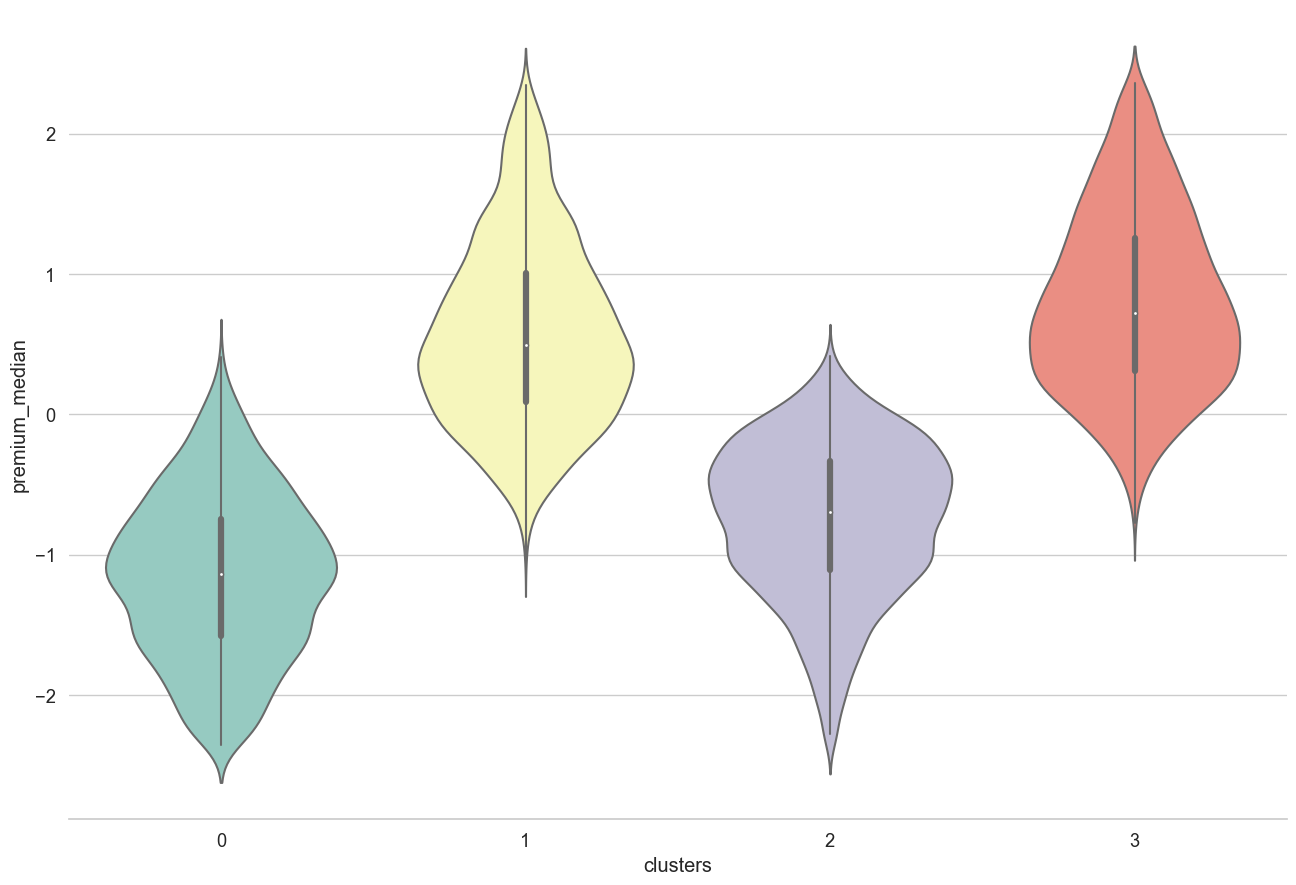

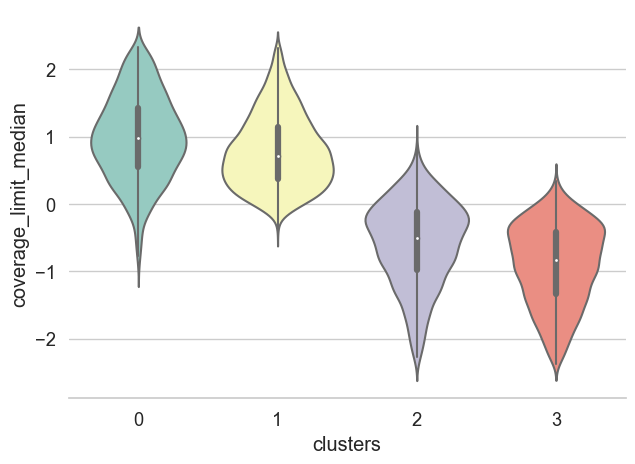

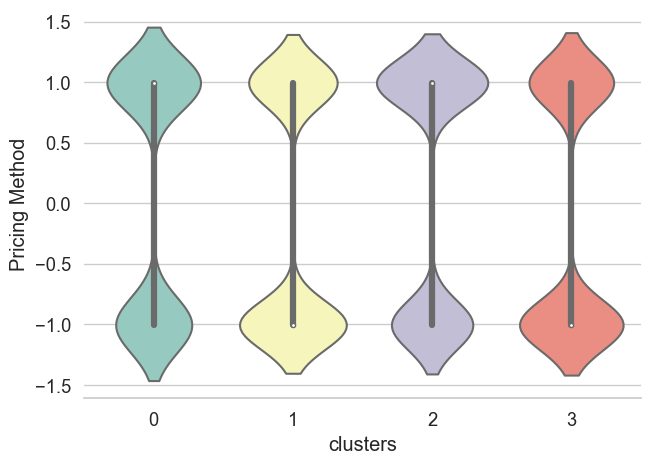

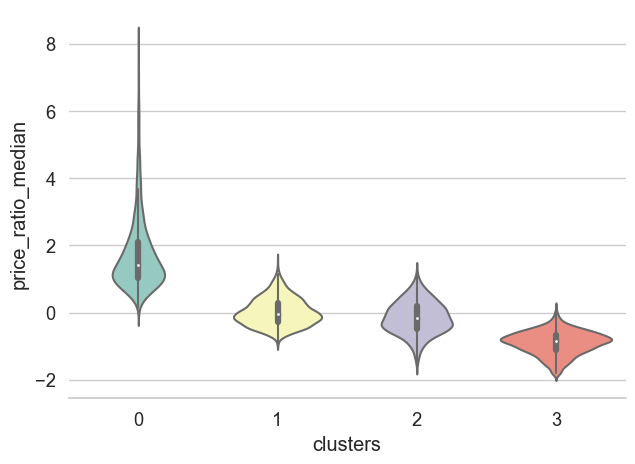

            Visualization of Coordination Chart               


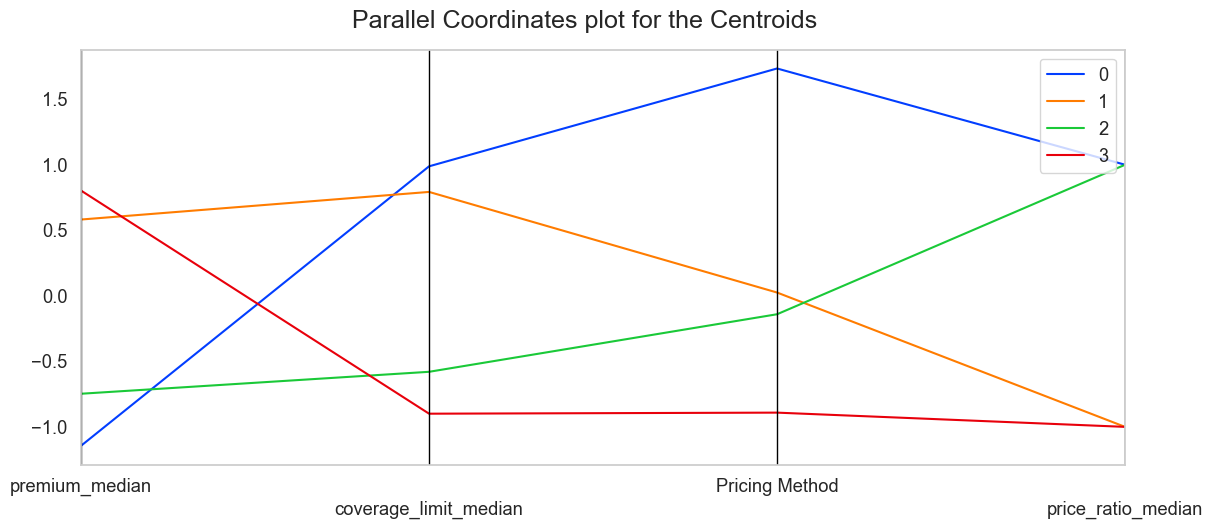

In [52]:
Visualization_results(scaled_data,df1,best_centroids,clusters,pca_v=False)

## Observations from the boxplot chart:

   * Variance Between Clusters: The boxplot reveals a healthy amount of variance between the clusters, particularly evident in the features coverage_limit_median, premium_median, and price_ratio_median.
   * Coverage Limit Median: Clusters 1 and 2 exhibit the highest mean values for coverage_limit_median, indicating potentially higher coverage limits within these clusters. Clusters 0 and 3, on the other hand, have lower mean values for coverage_limit_median, suggesting comparatively lower coverage limits.
   * Premium Median: While there is variance in the distribution of clusters for premium_median, Clusters 1 and 3 demonstrate the highest mean values, followed by Cluster 0. Cluster 2 exhibits a lower mean value for premium_median.
   * Price Ratio Median: Cluster 2 displays a unique distribution for price_ratio_median, characterized by a larger number of outliers. Despite this, the order of clusters based on mean values seems to align with the distribution of coverage limits, with Cluster 2 having the highest mean followed by Clusters 1 and 3, and Cluster 0 having the lowest mean.

## Observations from the coordination plot:

   * Coverage Limit Median and Premium Median: The coordination plot confirms the variance between clusters, with Clusters 1 and 2 positioned higher in the coordination plot, indicating higher centroids for coverage_limit_median and premium_median. In contrast, Clusters 0 and 3 are positioned lower, reflecting lower centroids for these features.
   * Price Ratio Median: Cluster 2 stands out with a distinct distribution for price_ratio_median, as evident from its higher centroid position. This reaffirms the observation of a larger number of outliers in this cluster, suggesting potentially unique pricing strategies or factors influencing price ratios within this cluster.
   * Distribution of Pricing Methods: Additionally, the coordination plot reveals a notable distribution of clusters based on Pricing methods. Cluster 2 tends to be associated with "tarification à posteriori," while Clusters 0 and 1 exhibit different characteristics. Cluster 3 appears to be more aligned with "tarification à priori."

## Comparative Analysis of Clustering Methods

   * After meticulous evaluation of the clustering results obtained from hierarchical clustering and k-prototypes for the Price Score feature, we have opted to proceed with the clustering method derived from k-prototypes. This decision is underpinned by the method's commendable silhouette score, indicating satisfactory cluster cohesion and separation, along with its superior alignment with our business requirements, specifically addressing criteria such as coverage limits, premium pricing, price ratios, and pricing methods. Moreover, the clusters produced by k-prototypes exhibit a high level of interpretability and coherence, enabling clear differentiation of pricing strategies and preferences. Moving forward with this clustering method holds significant strategic implications, including optimized pricing strategies, targeted marketing and customer acquisition efforts, and informed risk management practices and product development initiatives, all of which are essential for enhancing overall business performance within the insurance agency.

## Clusters Interpretation :

### Cluster 0 :

   * Coverage Limit Median and Premium Median: This cluster offers insurance plans with lower average coverage limits and premiums, potentially appealing to customers looking for more affordable options.
   * Price Ratio Median: This cluster's pricing strategy appears to be consistent and is a very friendly consumer .

### Cluster 1 :

   * Coverage Limit Median and Premium Median: Cluster 1 provides insurance plans with higher average coverage limits and premiums, potentially appealing to customers looking for more comprehensive coverage.
   * Price Ratio Median: While not explicitly negative, the lack of variability in pricing strategies might limit the cluster's ability to capture different market segments.

### Cluster 2 :

   * Distribution of Pricing Methods: Cluster 2 employs a dynamic pricing approach, which could be beneficial for capturing value from customers based on their actual usage or risk profiles.
   
   * Coverage Limit Median and Premium Median: The potentially higher premiums and coverage limits might deter price-sensitive customers or those seeking more basic insurance plans.

### Cluster 3 :

   * Distribution of Pricing Methods: Cluster 3 employs a structured pricing approach, providing stability and predictability for both the business and its customers.
   * Coverage Limit Median and Premium Median: This cluster offers insurance plans with lower average coverage limits and premiums, potentially limiting its attractiveness compared to other clusters.

### Reordering  clusters 

In [55]:
df1['Price_Score']=clusters

In [ ]:
df1.head()

In [56]:
Price_clusters_mapping={2:3,0:2,1:1,3:0}

df1['Price_Score']=df1['Price_Score'].map(Price_clusters_mapping)
df1.to_csv('features_engineerd/Price_score.csv',index=False)